In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#  Step 1 import the data

In [3]:
df = pd.read_csv("car_done.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              157 non-null    int64  
 1   Manufacturer            157 non-null    object 
 2   Model                   157 non-null    object 
 3   Sales_in_thousands      157 non-null    float64
 4   four_year_resale_value  121 non-null    float64
 5   Vehicle_type            157 non-null    object 
 6   Price_in_thousands      155 non-null    float64
 7   Engine_size             156 non-null    float64
 8   Horsepower              156 non-null    float64
 9   Wheelbase               156 non-null    float64
 10  Width                   156 non-null    float64
 11  Length                  156 non-null    float64
 12  Curb_weight             155 non-null    float64
 13  Fuel_capacity           156 non-null    float64
 14  Fuel_efficiency         154 non-null    fl

In [5]:
# step 2 for data cleaning
# 1. check for null values
# 2. fill null values
# 3. remove duplicate values
# 4. remove unwanted columns

In [6]:
# check for null values
df.isnull()

,Unnamed: 0,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
153,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
154,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
155,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
# calculate sum of null values columnwise(check for null values)
df.isnull().sum()

Unnamed: 0                 0
Manufacturer               0
Model                      0
Sales_in_thousands         0
four_year_resale_value    36
Vehicle_type               0
Price_in_thousands         2
Engine_size                1
Horsepower                 1
Wheelbase                  1
Width                      1
Length                     1
Curb_weight                2
Fuel_capacity              1
Fuel_efficiency            3
Latest_Launch              0
Power_perf_factor          2
dtype: int64

In [8]:
# return the value count of columns
df["four_year_resale_value"].value_counts()


four_year_resale_value
18.225    2
12.025    2
7.750     2
16.575    2
16.360    1
         ..
34.080    1
11.425    1
13.240    1
16.725    1
13.760    1
Name: count, Length: 117, dtype: int64

In [9]:
print("Median",df["four_year_resale_value"].median())
print(df["four_year_resale_value"].describe())

Median 14.18
count    121.000000
mean      18.072975
std       11.453384
min        5.160000
25%       11.260000
50%       14.180000
75%       19.875000
max       67.550000
Name: four_year_resale_value, dtype: float64


In [10]:
#now seeing median is less than mean so we cannot fill mean as value so we will fill median
# treatment of null values
df["four_year_resale_value"].fillna(value = 14.18,inplace= True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5436\3736532508.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["four_year_resale_value"].fillna(value = 14.18,inplace= True)


In [11]:
df.ffill(inplace = True)

In [12]:
df.isnull().sum().sum()#total null values now

np.int64(0)

In [13]:
# check for duplicates
df.duplicated().sum()

np.int64(0)

In [14]:
# remove duplicates
df.drop_duplicates(inplace = True)

In [15]:
df.columns

Index(['Unnamed: 0', 'Manufacturer', 'Model', 'Sales_in_thousands',
       'four_year_resale_value', 'Vehicle_type', 'Price_in_thousands',
       'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Latest_Launch',
       'Power_perf_factor'],
      dtype='object')

In [16]:
df.nunique()# number of unique values in every column

Unnamed: 0                157
Manufacturer               30
Model                     156
Sales_in_thousands        157
four_year_resale_value    117
Vehicle_type                2
Price_in_thousands        152
Engine_size                31
Horsepower                 66
Wheelbase                  88
Width                      78
Length                    127
Curb_weight               147
Fuel_capacity              55
Fuel_efficiency            20
Latest_Launch             130
Power_perf_factor         154
dtype: int64

In [17]:
df["Unnamed: 0"].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156])

In [18]:
df.drop(columns = "Unnamed: 0",inplace = True)

In [19]:
df

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,28.40,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,91.370778
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,14.180,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,14.180,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,14.180,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,14.180,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Manufacturer            157 non-null    object 
 1   Model                   157 non-null    object 
 2   Sales_in_thousands      157 non-null    float64
 3   four_year_resale_value  157 non-null    float64
 4   Vehicle_type            157 non-null    object 
 5   Price_in_thousands      157 non-null    float64
 6   Engine_size             157 non-null    float64
 7   Horsepower              157 non-null    float64
 8   Wheelbase               157 non-null    float64
 9   Width                   157 non-null    float64
 10  Length                  157 non-null    float64
 11  Curb_weight             157 non-null    float64
 12  Fuel_capacity           157 non-null    float64
 13  Fuel_efficiency         157 non-null    float64
 14  Latest_Launch           157 non-null    ob

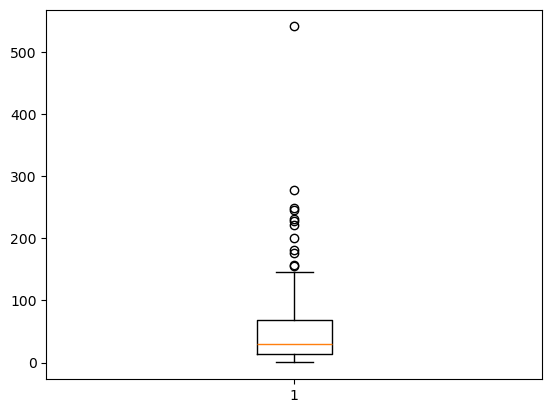

In [21]:
plt.boxplot(df["Sales_in_thousands"])
plt.show()

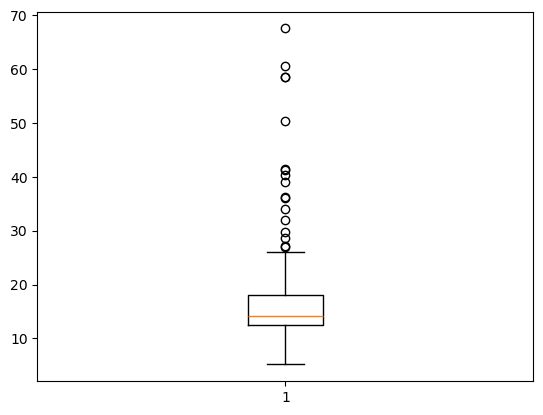

In [22]:
plt.boxplot(df["four_year_resale_value"])
plt.show()

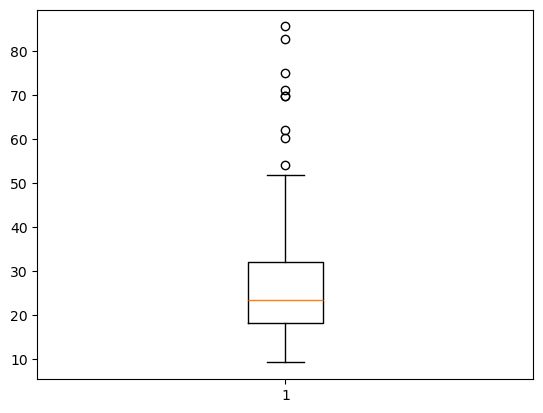

In [23]:
plt.boxplot(df["Price_in_thousands"])
plt.show()

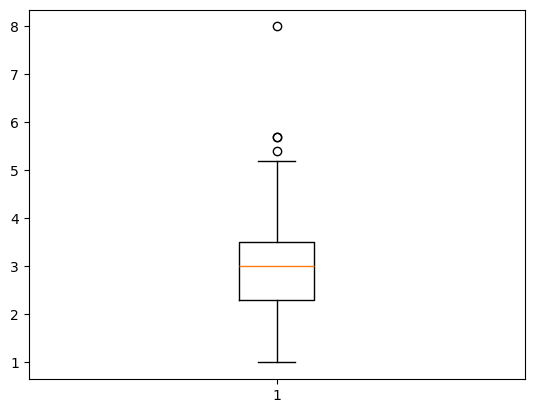

In [24]:
plt.boxplot(df["Engine_size"])
plt.show()

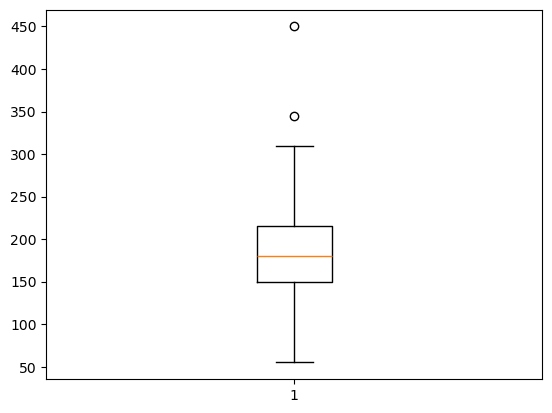

In [25]:
plt.boxplot(df["Horsepower"])
plt.show()

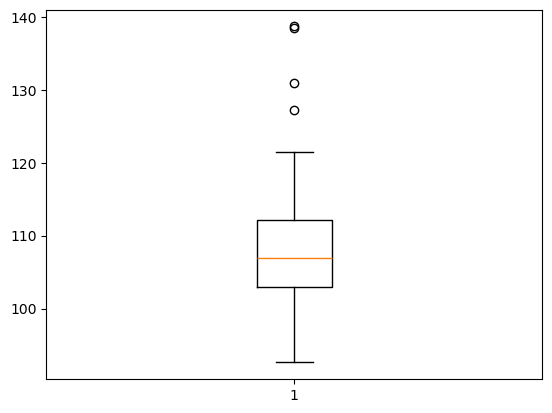

In [26]:
plt.boxplot(df["Wheelbase"])
plt.show()

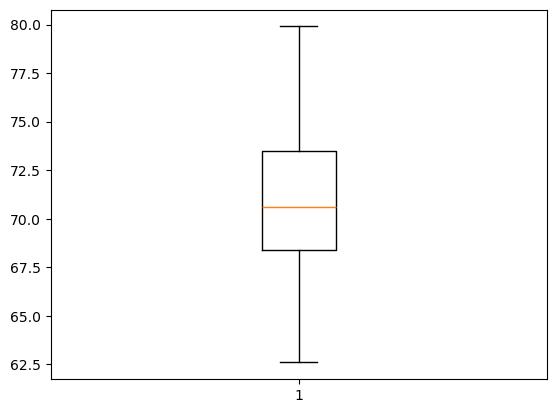

In [27]:
plt.boxplot(df["Width"])
plt.show()

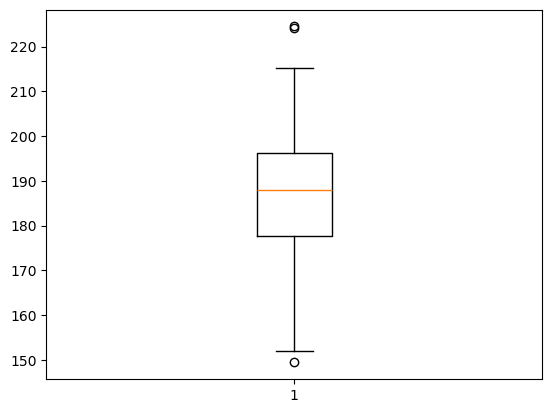

In [28]:
plt.boxplot(df["Length"])
plt.show()

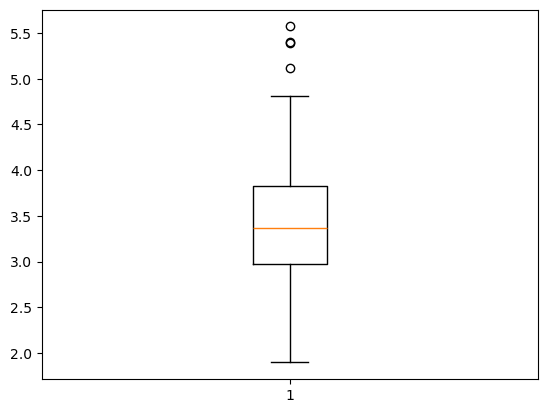

In [29]:
plt.boxplot(df["Curb_weight"])
plt.show()

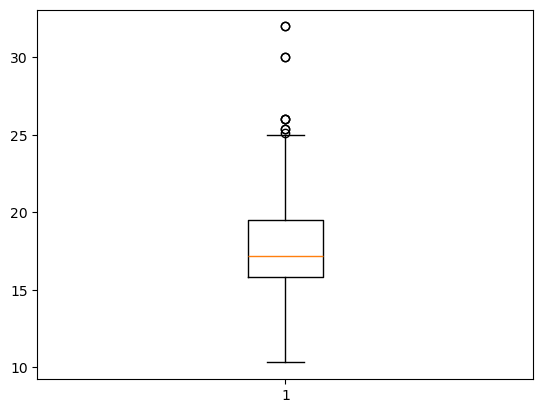

In [30]:
plt.boxplot(df["Fuel_capacity"])
plt.show()

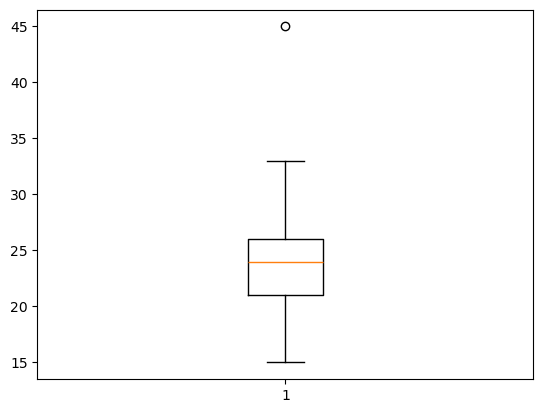

In [31]:
plt.boxplot(df["Fuel_efficiency"])
plt.show()

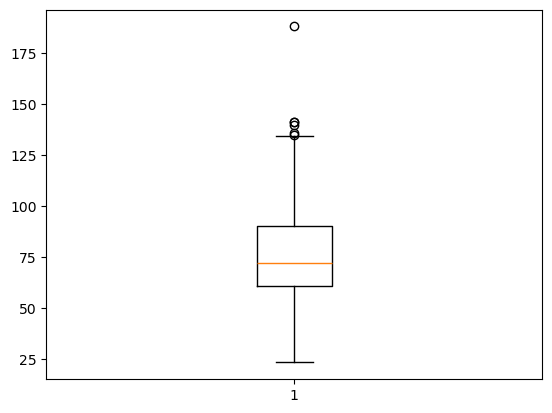

In [32]:
plt.boxplot(df["Power_perf_factor"])
plt.show()

In [33]:
def IQR(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    LF = q1 - (1.5 * iqr)
    UF = q3 + (1.5 * iqr)
    print("LF---->",LF)
    print("UF---->",UF)
    

In [34]:
df.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', 'four_year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [35]:
IQR(df["Sales_in_thousands"])

LF----> -66.649
UF----> 148.719


In [36]:
df["Sales_in_thousands"] = np.where(df["Sales_in_thousands"] > 148.719,148.719,df["Sales_in_thousands"])

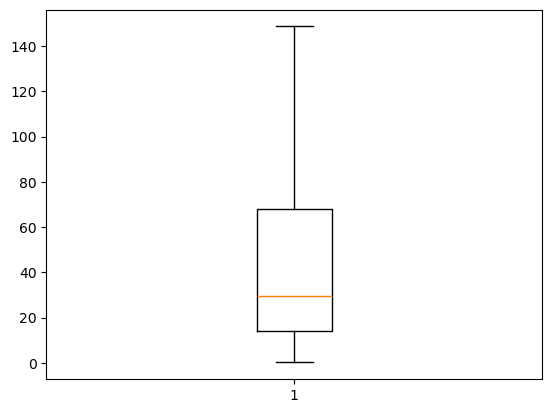

In [37]:
plt.boxplot(df["Sales_in_thousands"])
plt.show()

In [38]:
IQR(df["four_year_resale_value"])

LF----> 4.152499999999998
UF----> 26.532500000000002


In [39]:
df["four_year_resale_value"] = np.where(df["four_year_resale_value"] > 26.532500000000002 ,26.532500000000002,df["four_year_resale_value"])

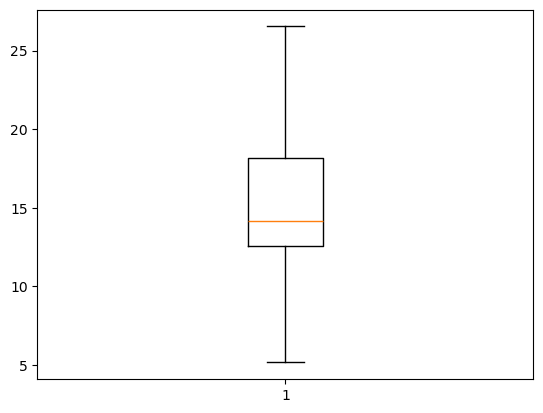

In [40]:
plt.boxplot(df["four_year_resale_value"])
plt.show()

In [41]:
IQR(df["Price_in_thousands"])

LF----> -2.5325000000000024
UF----> 52.6075


In [42]:
df["Price_in_thousands"] = np.where(df["Price_in_thousands"] > 52.6075 ,52.6075,df["Price_in_thousands"])

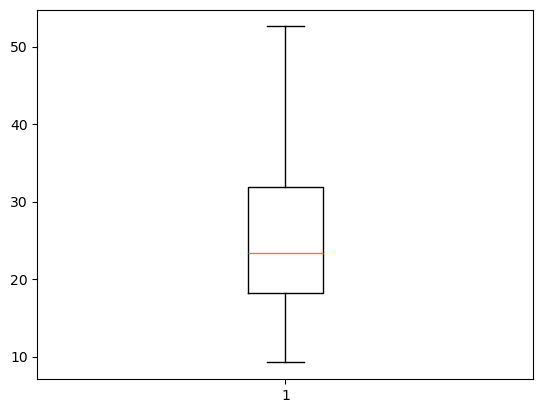

In [43]:
plt.boxplot(df["Price_in_thousands"])
plt.show()

In [44]:
IQR(df["Engine_size"])

LF----> 0.49999999999999956
UF----> 5.300000000000001


In [45]:
df["Engine_size"] = np.where(df["Engine_size"] >5.300000000000001 ,5.300000000000001,df["Engine_size"])

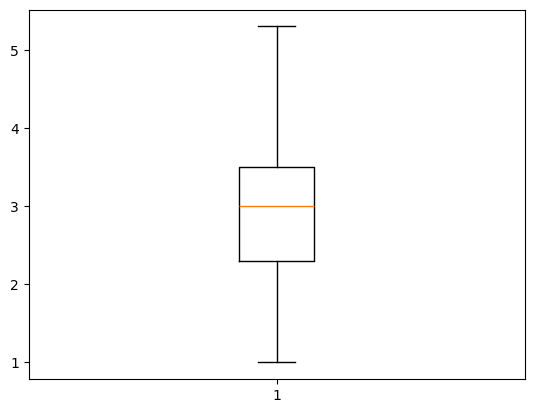

In [46]:
plt.boxplot(df["Engine_size"])
plt.show()

In [47]:
IQR(df["Horsepower"])

LF----> 52.5
UF----> 312.5


In [48]:
df["Horsepower"] = np.where(df["Horsepower"] >312.5 ,312.5,df["Horsepower"])

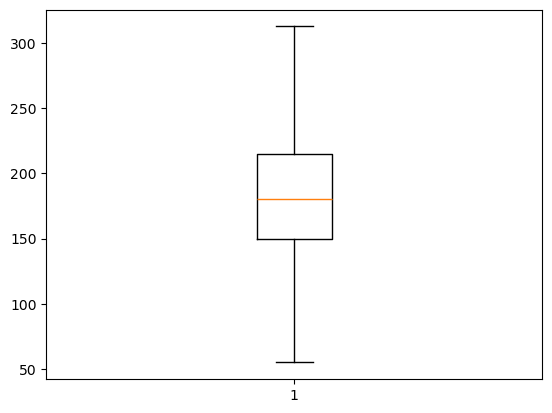

In [49]:
plt.boxplot(df["Horsepower"])
plt.show()

In [50]:
IQR(df["Wheelbase"])

LF----> 89.19999999999999
UF----> 126.0


In [51]:
df["Wheelbase"] = np.where(df["Wheelbase"] >126.0 ,126.0,df["Wheelbase"])

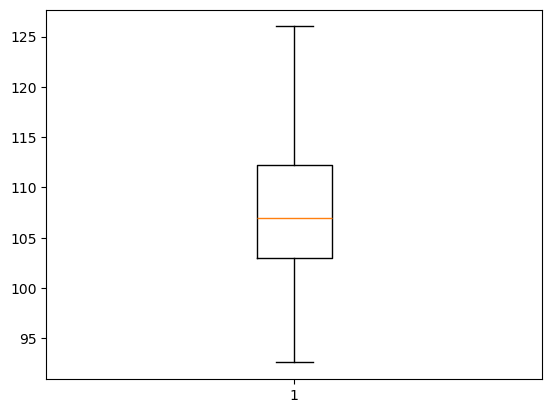

In [52]:
plt.boxplot(df["Wheelbase"])
plt.show()

In [53]:
IQR(df["Width"])

LF----> 60.750000000000014
UF----> 81.14999999999999


In [54]:
df["Width"] = np.where(df["Width"] > 81.14999999999999,81.14999999999999,df["Width"])

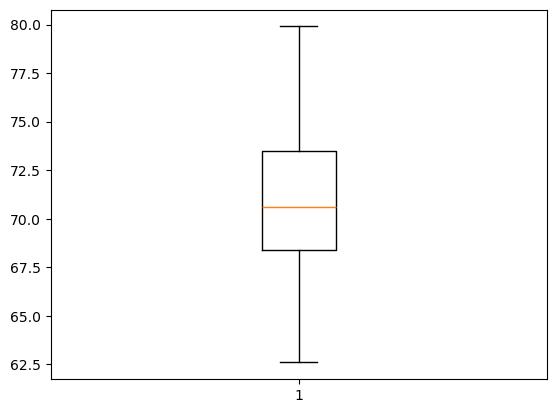

In [55]:
plt.boxplot(df["Width"])
plt.show()

In [56]:
IQR(df["Length"])

LF----> 149.7
UF----> 224.09999999999997


In [57]:
df["Length"] = np.where(df["Length"] > 224.09999999999997,224.09999999999997,df["Length"])
df["Length"] = np.where(df["Length"] < 149.7,149.7,df["Length"])


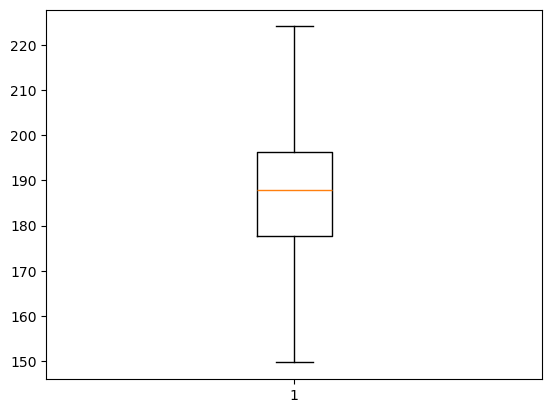

In [58]:
plt.boxplot(df["Length"])
plt.show()

In [59]:
IQR(df["Curb_weight"])

LF----> 1.706
UF----> 5.09


In [60]:
df["Curb_weight"] = np.where(df["Curb_weight"] > 5.09,5.09,df["Curb_weight"])

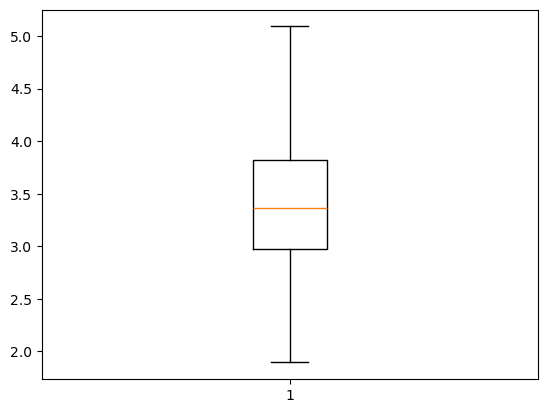

In [61]:
plt.boxplot(df["Curb_weight"])
plt.show()

In [62]:
IQR(df["Fuel_capacity"])

LF----> 10.250000000000002
UF----> 25.049999999999997


In [63]:
df["Fuel_capacity"] = np.where(df["Fuel_capacity"] >  25.049999999999997 , 25.049999999999997,df["Fuel_capacity"])

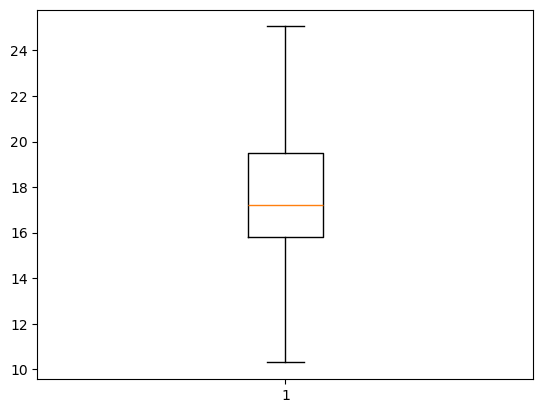

In [64]:
plt.boxplot(df["Fuel_capacity"])
plt.show()

In [65]:
IQR(df["Fuel_efficiency"])

LF----> 13.5
UF----> 33.5


In [66]:
df["Fuel_efficiency"] = np.where(df["Fuel_efficiency"] >  33.5 , 33.5,df["Fuel_efficiency"])

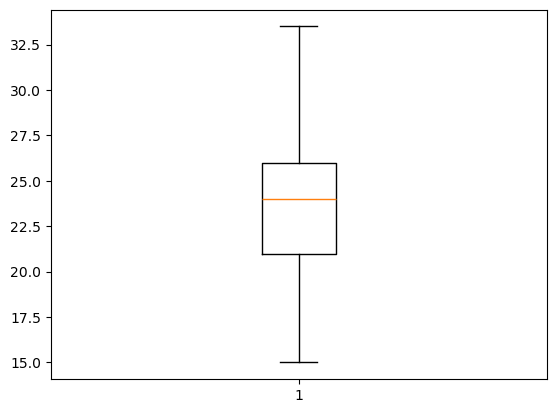

In [67]:
plt.boxplot(df["Fuel_efficiency"])
plt.show()

In [68]:
IQR(df["Power_perf_factor"])

LF----> 16.50106724999999
UF----> 134.43807973000003


In [69]:
df["Power_perf_factor"] = np.where(df["Power_perf_factor"] >   134.43807973000003 ,  134.43807973000003,df["Power_perf_factor"])

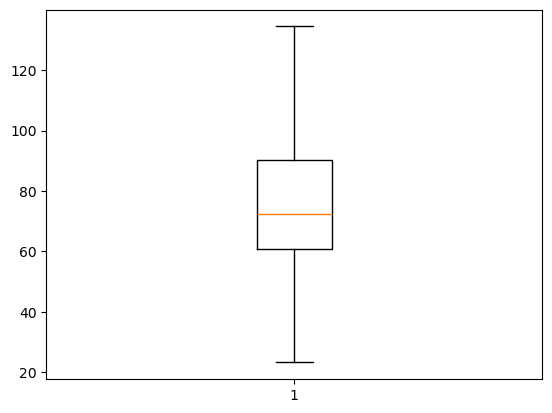

In [70]:
plt.boxplot(df["Power_perf_factor"])
plt.show()

In [71]:
# boxplotting at once after removing outliers
import seaborn as sns
def outliers(x):
    y = x.select_dtypes(include=[int,float])#selecting columns with int and float datatype
    for i in y:
        sns.boxplot(x=df[i])
        plt.title(i)
        plt.show()


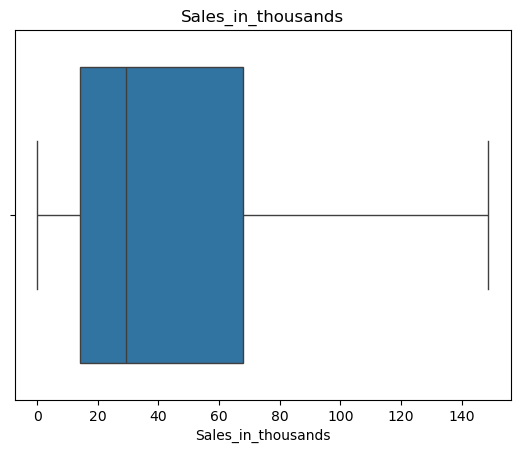

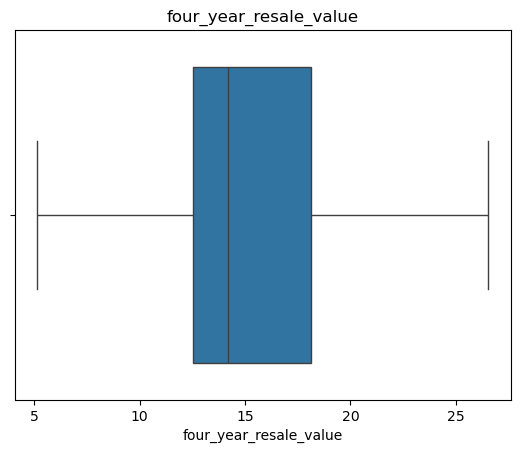

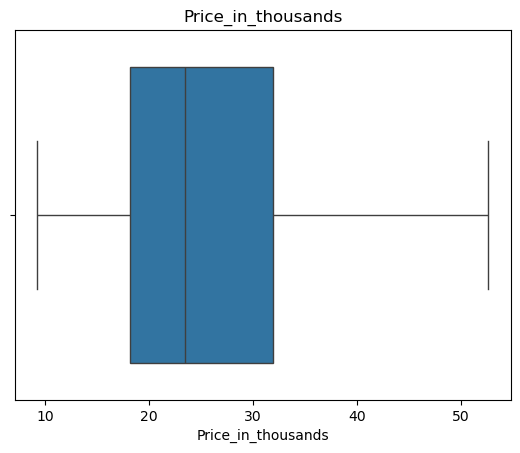

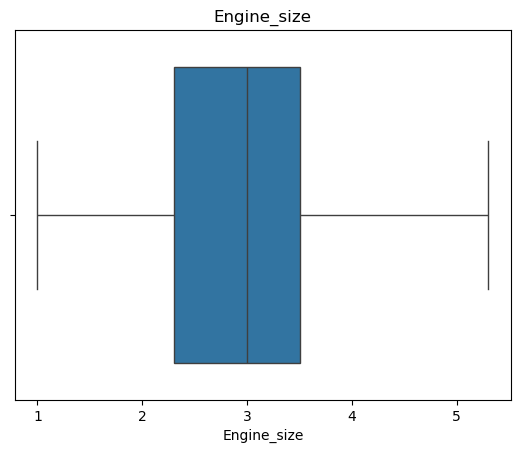

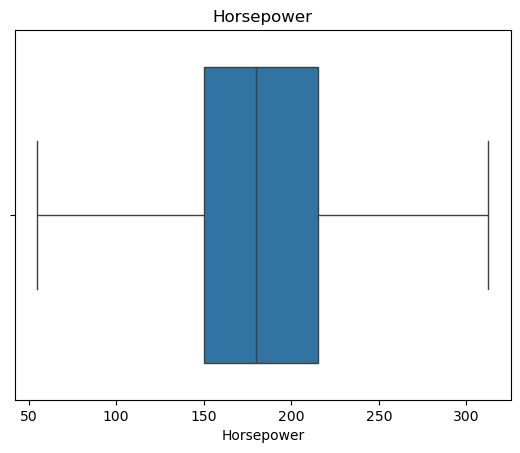

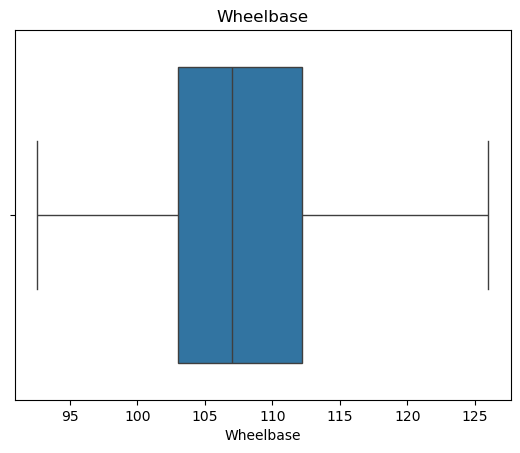

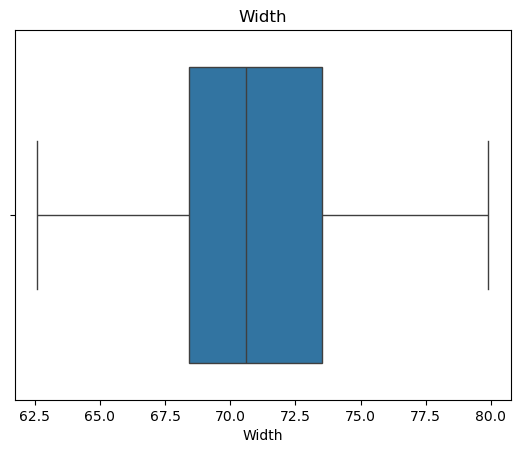

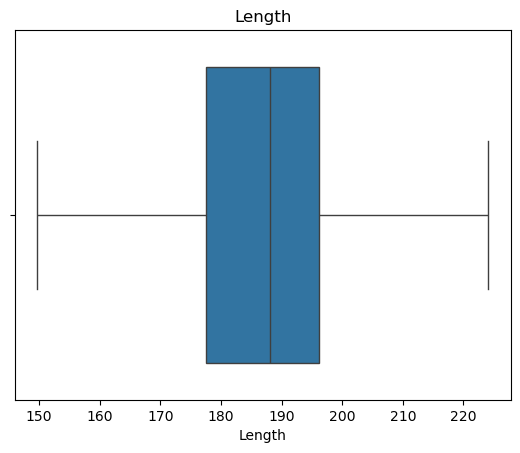

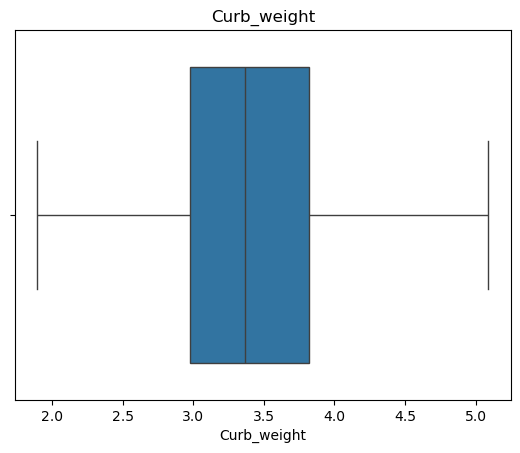

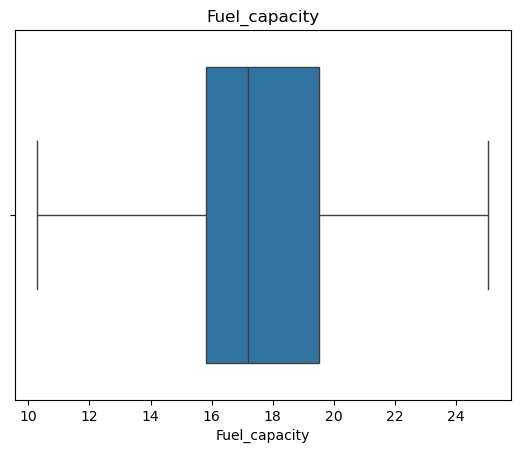

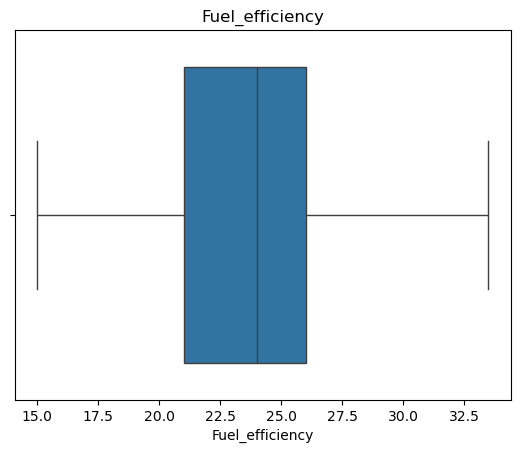

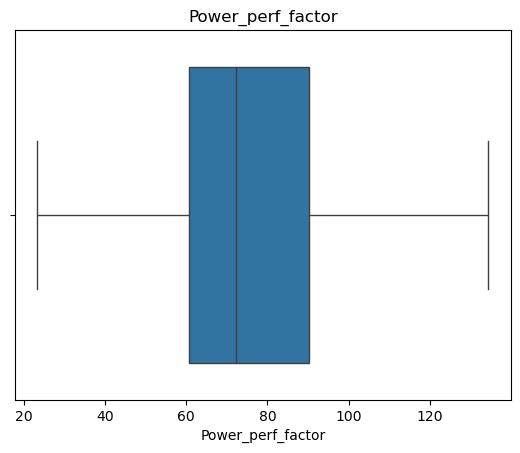

In [72]:
outliers(df)

In [73]:
# to create a correlation heatmap you must use only numerical columns


In [74]:
num = df.select_dtypes(include=[int,float])

<Axes: >

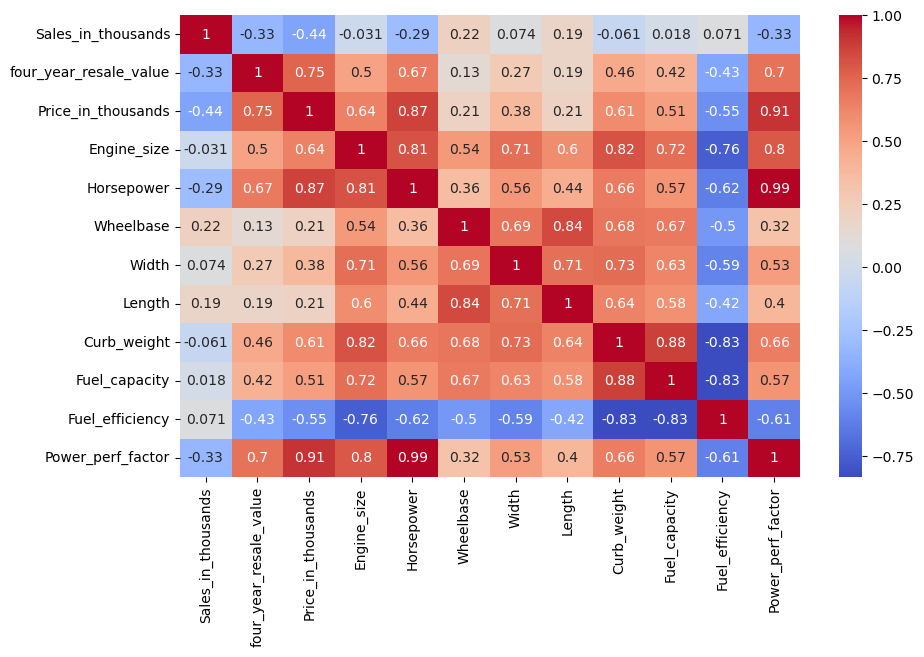

In [75]:
#annot is used for data labeling
plt.figure(figsize=(10,6))
sns.heatmap(num.corr(),annot=True,cmap="coolwarm")

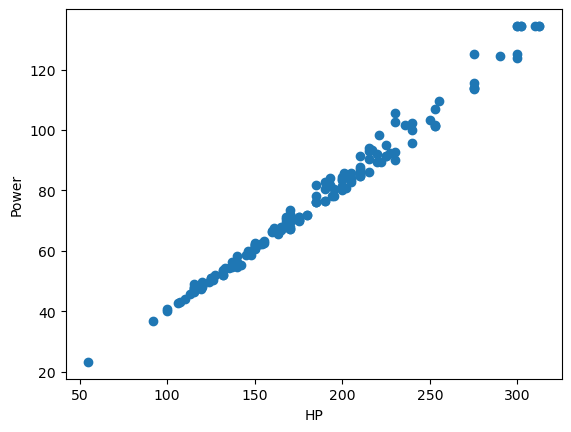

In [76]:
#horse power is highly correlated with power_perf_factor(0.99)
#highly correlated more than 70%(>0.7)
#remove highly correlated data
plt.scatter(df["Horsepower"],df["Power_perf_factor"])
plt.xlabel("HP")
plt.ylabel("Power")
plt.show()

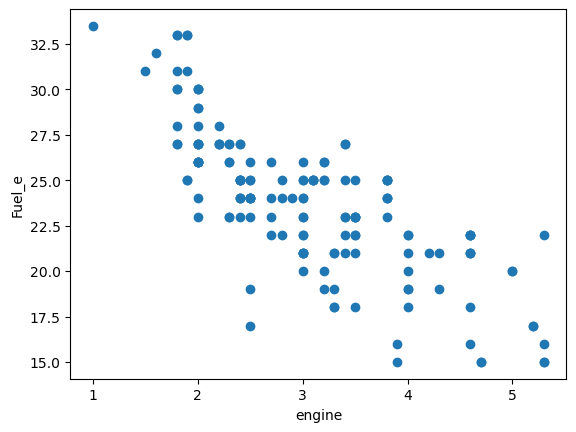

In [77]:
#negatively correlated >-0.7
plt.scatter(df["Engine_size"],df["Fuel_efficiency"])
plt.xlabel("engine")
plt.ylabel("Fuel_e")
plt.show()
            

In [78]:
df.select_dtypes(object)

,Manufacturer,Model,Vehicle_type,Latest_Launch
0,Acura,Integra,Passenger,2/2/2012
1,Acura,TL,Passenger,6/3/2011
2,Acura,CL,Passenger,1/4/2012
3,Acura,RL,Passenger,3/10/2011
4,Audi,A4,Passenger,10/8/2011
...,...,...,...,...
152,Volvo,V40,Passenger,9/21/2011
153,Volvo,S70,Passenger,11/24/2012
154,Volvo,V70,Passenger,6/25/2011
155,Volvo,C70,Passenger,4/26/2011


In [79]:
df.select_dtypes(object).columns

Index(['Manufacturer', 'Model', 'Vehicle_type', 'Latest_Launch'], dtype='object')

In [80]:
df["Manufacturer"].value_counts()

Manufacturer
Ford          11
Dodge         11
Chevrolet      9
Mercedes-B     9
Toyota         9
Chrysler       7
Mitsubishi     7
Nissan         7
Mercury        6
Oldsmobile     6
Lexus          6
Pontiac        6
Volvo          6
Volkswagen     6
Cadillac       5
Honda          5
Saturn         5
Plymouth       4
Buick          4
Acura          4
Audi           3
BMW            3
Lincoln        3
Porsche        3
Jeep           3
Hyundai        3
Saab           2
Subaru         2
Jaguar         1
Infiniti       1
Name: count, dtype: int64

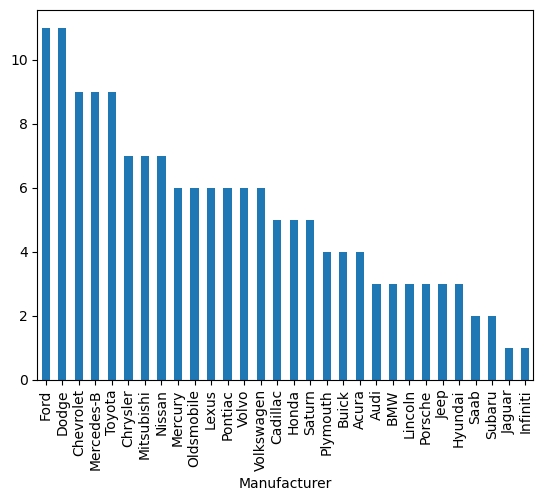

In [81]:
df["Manufacturer"].value_counts().plot.bar()
plt.show()

In [82]:
df["Model"].value_counts()

Model
Neon       2
Integra    1
CL         1
TL         1
A4         1
          ..
V40        1
S70        1
V70        1
C70        1
S80        1
Name: count, Length: 156, dtype: int64

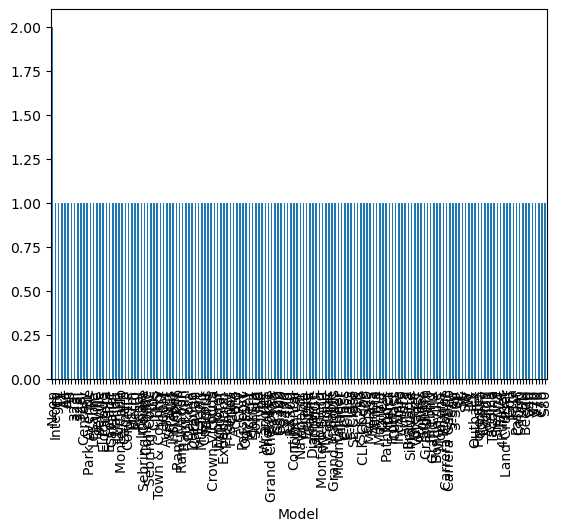

In [83]:
df["Model"].value_counts().plot.bar()
plt.show()

In [84]:
df["Vehicle_type"].value_counts()

Vehicle_type
Passenger    116
Car           41
Name: count, dtype: int64

<Axes: xlabel='Vehicle_type'>

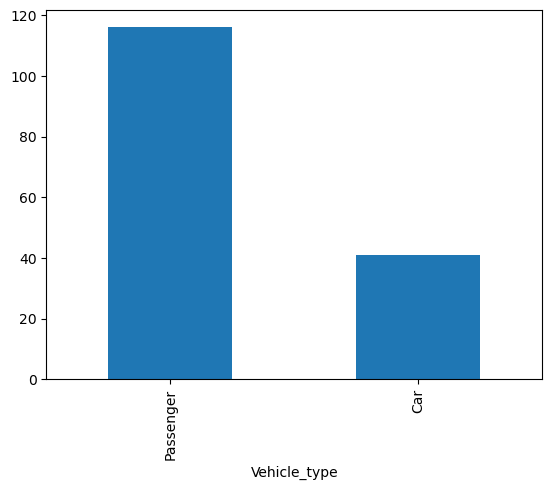

In [85]:
df["Vehicle_type"].value_counts().plot.bar()

In [86]:
df["Manufacturer"].nunique()

30

In [87]:
df["Vehicle_type"].value_counts()

Vehicle_type
Passenger    116
Car           41
Name: count, dtype: int64

In [88]:
df["Vehicle_type"] = np.where(df["Vehicle_type"]=="Car",1,0)#machine does not identify text so using 0 and 1

In [89]:
df["Vehicle_type"].value_counts()

Vehicle_type
0    116
1     41
Name: count, dtype: int64

In [90]:
df.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', 'four_year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [91]:
#Model Making
X = df[[ 'four_year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Power_perf_factor']]
y = df["Sales_in_thousands"]


In [92]:
# check if there is any text column or not if any so remove it
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   four_year_resale_value  157 non-null    float64
 1   Vehicle_type            157 non-null    int64  
 2   Price_in_thousands      157 non-null    float64
 3   Engine_size             157 non-null    float64
 4   Horsepower              157 non-null    float64
 5   Wheelbase               157 non-null    float64
 6   Width                   157 non-null    float64
 7   Length                  157 non-null    float64
 8   Curb_weight             157 non-null    float64
 9   Fuel_capacity           157 non-null    float64
 10  Fuel_efficiency         157 non-null    float64
 11  Power_perf_factor       157 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 14.8 KB


In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=88)

In [95]:
X_train

,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
121,14.010,0,21.665,3.8,195.0,110.5,72.7,196.5,3.396,18.0,25.0,78.318168
20,11.225,0,16.535,3.1,170.0,107.0,69.4,190.4,3.051,15.0,25.0,67.314462
114,7.750,0,12.640,2.0,132.0,105.0,74.4,174.4,2.559,12.5,29.0,52.084899
151,14.180,0,23.400,1.9,160.0,100.5,67.6,176.6,2.998,15.8,25.0,66.113057
156,14.180,0,36.000,2.9,201.0,109.9,72.1,189.8,3.600,21.1,24.0,85.735655
...,...,...,...,...,...,...,...,...,...,...,...,...
62,5.860,0,9.699,1.5,92.0,96.1,65.7,166.7,2.240,11.9,31.0,36.672284
101,8.450,0,13.499,1.8,126.0,99.8,67.3,177.5,2.593,13.2,30.0,50.241978
148,16.575,0,19.990,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,48.907372
106,14.180,1,22.799,3.3,170.0,104.3,70.4,178.0,3.821,19.4,18.0,69.782944


In [96]:
y_train

121     92.364
20     135.126
114     32.734
151     16.957
156     18.969
        ...   
62      41.184
101     42.643
148      9.569
106     54.158
32      13.462
Name: Sales_in_thousands, Length: 125, dtype: float64

In [97]:
X_test.shape

(32, 12)

In [98]:
# linear regression
from sklearn.linear_model import LinearRegression

In [99]:
lr = LinearRegression()

In [100]:
#model fitting
lr.fit(X_train,y_train) # if error comes so there is a text column (0bject)

LinearRegression()

In [101]:
print("R_square",lr.score(X_train,y_train))

R_square 0.4169085526174029


In [102]:
#to improve accuracy we can use log1p,square,expt and the one we get normal distribution take that

In [103]:
#make improved model

In [104]:
X = df[[ 'four_year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Power_perf_factor']]
y = np.log1p(df["Sales_in_thousands"])

In [105]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=88)

In [106]:
l1 = LinearRegression()

In [107]:
l1.fit(X_train,y_train)

LinearRegression()

In [108]:
print("R_square",l1.score(X_train,y_train))#improved by 10%

R_square 0.5274176263176127


In [109]:
from sklearn.metrics import mean_squared_error,r2_score

In [110]:
np.exp(y_train)

121     93.364
20     136.126
114     33.734
151     17.957
156     19.969
        ...   
62      42.184
101     43.643
148     10.569
106     55.158
32      14.462
Name: Sales_in_thousands, Length: 125, dtype: float64

In [111]:
actual = np.exp(y_train)
predict = np.exp(l1.predict(X_train))
error = actual - predict
MSE = np.mean(np.square(error))
RMSE = np.sqrt(MSE)

In [112]:
print("MSE",MSE)
print("RMSE",RMSE)

MSE 1123.504921470461
RMSE 33.51872493801727


In [113]:
from sklearn.metrics import root_mean_squared_error

In [114]:
print("mean_Sq_er",mean_squared_error(actual,predict))
print("RMSE",root_mean_squared_error(actual,predict))


mean_Sq_er 1123.504921470461
RMSE 33.51872493801727


In [115]:
#both  are same 

In [116]:
# to predict 
lr.predict(name)

NameError: name 'name' is not defined

In [120]:
lr.intercept_#for linear RELU

np.float64(-253.4468174597864)